In [29]:
import os
import librosa
import numpy as np
import pandas as pd
import re

In [109]:
%cd C:\Users\dtata\Downloads\data\data

label = lambda text: 1 if re.sub(r' .*$', '', text).capitalize()=='True' else 0
easy_model = lambda y, sr: 1 if np.min(list(map(np.min, librosa.feature.chroma_stft(y=y, sr=sr)))) < 0.003046*.02 else 0
def predict(original_path):
    y, sr = librosa.load(original_path)
    return easy_model(y,sr)

original = os.listdir('.')
original_lst = []
predict_lst = []

for i in range(len(original)):
    text = original[i]
    original_lst.append(label(text))
    predict_lst.append(predict(text))

data = pd.DataFrame()
data['path'] = original
data['original'] = original_lst
data['predict'] = predict_lst
data['equality'] = data['original'] == data['predict']
display(data)

#True - верные ответы. False - ошибочные распознания
display(data.value_counts('equality'))

C:\Users\dtata\Downloads\data\data


,path,original,predict,equality
0,false (1).mp3,0,0,True
1,false (10).mp3,0,0,True
2,false (11).mp3,0,0,True
3,false (12).mp3,0,0,True
4,false (2).mp3,0,0,True
...,...,...,...,...
56,true (5).mp3,1,1,True
57,true (6).mp3,1,1,True
58,true (7).mp3,1,1,True
59,true (8).mp3,1,1,True


equality
True     58
False     3
Name: count, dtype: int64

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score
from tensorflow.math import confusion_matrix as tensorflow_confusion_matrix
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

# визуализируем матрицы ошибок
def get_confusion_matrix(y_pred, y_test, title='Тест'):
    # Получаем истинные метки
    y_true = y_test

    # проверим модель на эффективность. Выводим матрицу ошибок
    recall = ("recall: %.2f" % recall_score(y_true, y_pred))
    precision = ("precision: %.2f" % precision_score(y_true, y_pred))

    # Создаем фигуру с двумя подграфиками, расположенными рядом
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Строим вторую тепловую карту на втором подграфике
    cm = tensorflow_confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[0])
    axes[0].set_title(f'{title}. {recall}, {precision}')

    # Строим первую тепловую карту на первом подграфике
    cm = sklearn_confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, ax=axes[1])
    axes[1].set_title('Соотношение в процентах. Итоговая точность: {0}'.format(round((cm[0][0]+cm[1][1])/2, 2)))

    plt.show()

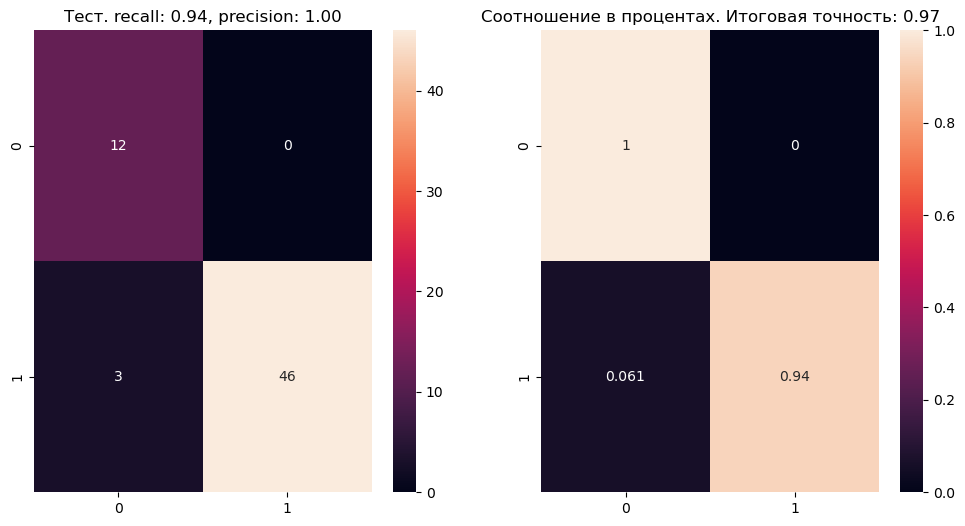

In [111]:
get_confusion_matrix(np.array(data['predict']), np.array(data['original']), title='Тест')